# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
#sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
#sns.set_style('white')
sns.set_style("darkgrid")
%matplotlib inline

# Load data

In [3]:
hemdata = pd.read_csv('hemdata.csv')

In [4]:
hemdata.head()

,Unnamed: 0,index,address,finalprice,askprice,area_sqm,rooms,monthfee,Location,SaleDate,...,juli,juni,maj,mars,nan,oktober,september,lnp,lnarea,lnfee
0,0,0,Svartviksslingan 88,3400000,2995000.0,63,2,3829.0,Minneberg,25 oktober 2018,...,0,0,0,0,0,1,0,15.039286,4.143135,8.250359
1,1,1,Krukmakargatan 57,2900000,2850000.0,36,1,2359.0,Högalid,12 oktober 2018,...,0,0,0,0,0,1,0,14.880221,3.583519,7.765993
2,2,2,Sågargatan 16,3050000,2375000.0,29,1,1912.0,Södermalm,18 september 2018,...,0,0,0,0,0,0,1,14.930652,3.367296,7.555905
3,3,3,"Sandelsgatan 35, 2 Tr",4000000,3675000.0,41,2,2198.0,Nedre,24 oktober 2018,...,0,0,0,0,0,1,0,15.201805,3.713572,7.695303
4,4,4,Svärdlångsvägen 47,3025000,3100000.0,70,3,4583.0,Årsta,22 oktober 2018,...,0,0,0,0,0,1,0,14.922422,4.248495,8.430109


In [5]:
hemdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9503 entries, 0 to 9502
Data columns (total 40 columns):
Unnamed: 0        9503 non-null int64
index             9503 non-null int64
address           9503 non-null object
finalprice        9503 non-null int64
askprice          9503 non-null float64
area_sqm          9503 non-null int64
rooms             9503 non-null int64
monthfee          9486 non-null float64
Location          9368 non-null object
SaleDate          9503 non-null object
SaleDay           9502 non-null float64
SaleMonth         9502 non-null float64
SaleYear          9502 non-null float64
statsdel          8552 non-null object
district          8552 non-null object
AvgDelInc         8552 non-null float64
AvgDistrInc       8552 non-null float64
finalprice_sqm    9503 non-null float64
askprice_sqm      9503 non-null float64
diff_sqm          9503 non-null float64
bud               9503 non-null float64
year              9502 non-null float64
month             9502 non-n

## Visual analysis

In [6]:
dfvis = hemdata[['lnp','lnarea','rooms', 'lnfee', 'bud', 'precipitation','cloudiness']]

In [7]:
dfvis.dropna(inplace = True) 

### Normalize continuous variables

In [8]:
dfvis_norm = (dfvis - dfvis.mean()) / (dfvis.std())

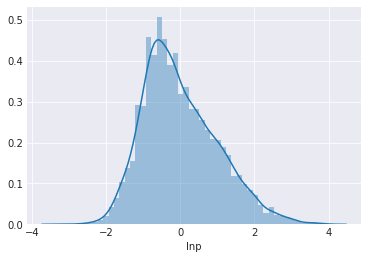

In [9]:
sns.distplot(dfvis_norm['lnp'])

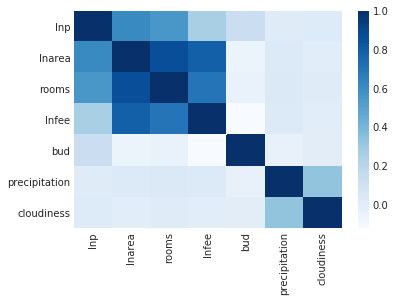

In [10]:
sns.heatmap(dfvis_norm.corr(),cmap="Blues")

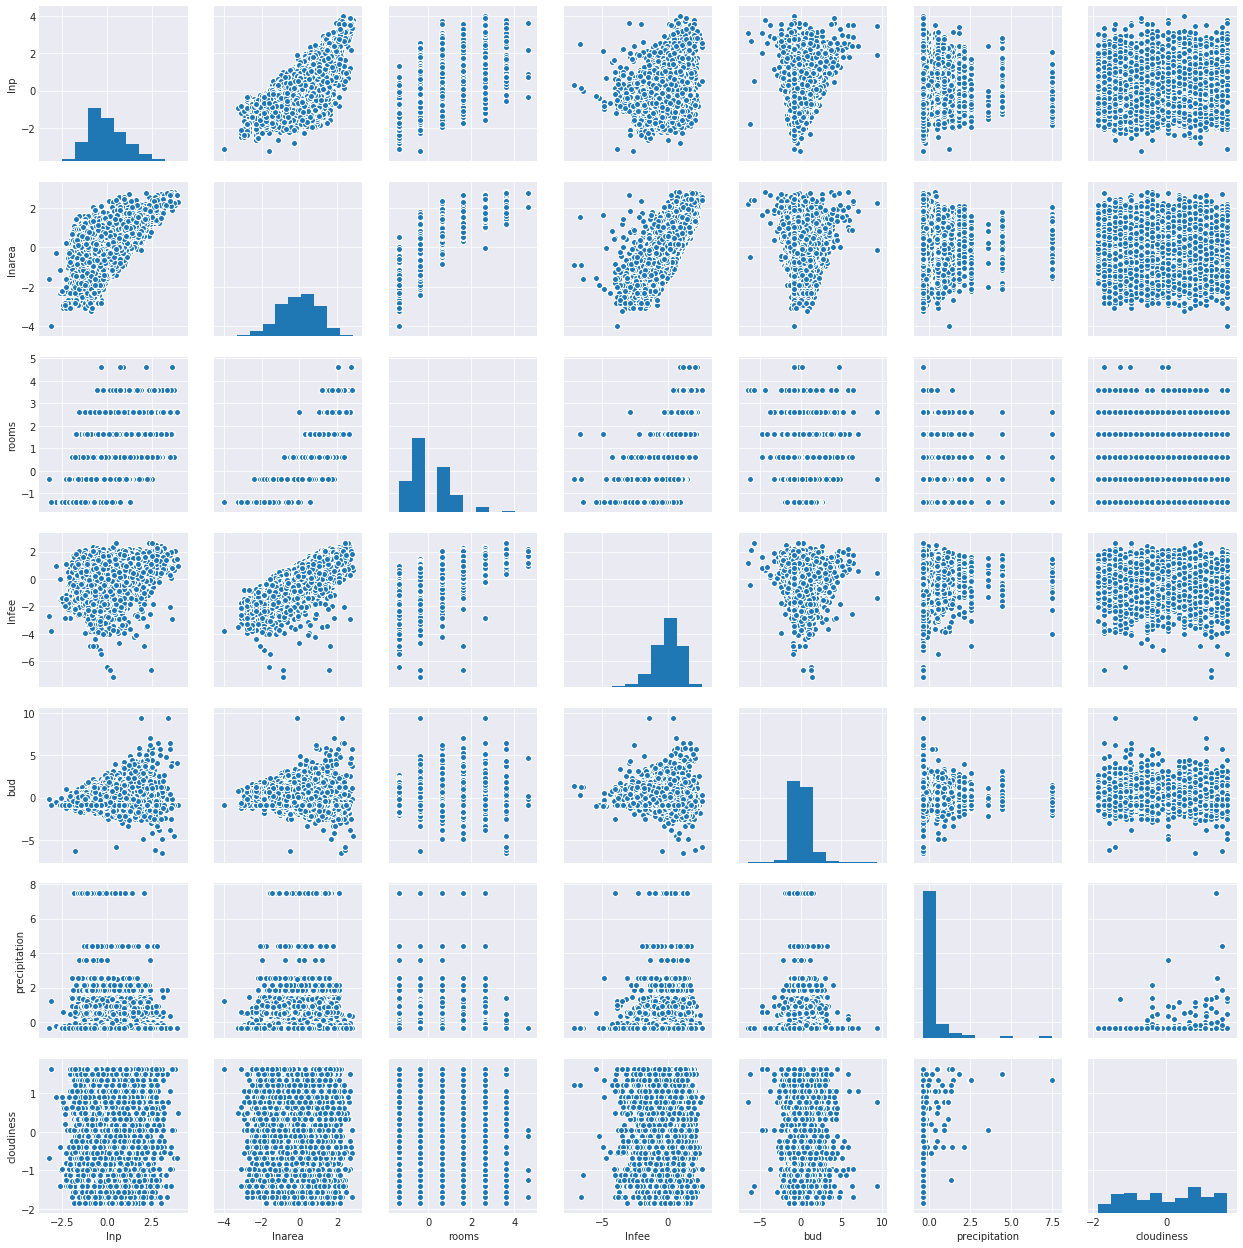

In [11]:
sns.pairplot(dfvis_norm)

## Linear regression

In [12]:
hemdata_dummies = hemdata[['mars','april', 'maj', 'juni','juli','augusti','september','oktober']]

In [13]:
location_dummies = pd.get_dummies(hemdata['Location'])

In [14]:
hemdata_cont =  hemdata[['lnp','cloudiness','lnarea','rooms', 'lnfee']]

### Normalize continuous variables

In [15]:
df_norm = (hemdata_cont - hemdata_cont.mean()) / (hemdata_cont.std())

In [16]:
df = pd.concat([df_norm,hemdata_dummies],axis=1)

In [17]:
df = pd.concat([df,location_dummies],axis=1)

In [18]:
df.dropna(inplace = True) 

In [19]:
df.head()

,lnp,cloudiness,lnarea,rooms,lnfee,mars,april,maj,juni,juli,...,Traneberg,Vasastaden,Vällingby,Västertorp,Älvsjö,Årsta,Örby,Örnsberg,Östberga,Östermalm
0,-0.172031,0.334813,0.277019,-0.370814,0.582846,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.548315,-0.971236,-1.092577,-1.366252,-0.533111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.429016,-0.096649,-1.621759,-1.366252,-1.017144,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.212424,-1.262765,-0.774287,-0.370814,-0.695977,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.448486,-1.262765,0.534877,0.624623,0.996982,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
X = df.iloc[:,1:100] 
X_noweather = df.iloc[:,2:100] 
y = df[['lnp']]

In [21]:
model = sm.OLS(y, X)
model_noweather = sm.OLS(y, X_noweather)

## OLS Results: cloudiness

In [22]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnp   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     623.4
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:35:09   Log-Likelihood:                -3891.4
No. Observations:                9485   AIC:                             7981.
Df Residuals:                    9386   BIC:                             8689.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cloudiness              0.0016    

In [23]:
print('Adjusted coefficient of determination:', results.rsquared_adj)
print('Cloudiness coefficient:', results.params[0])

Adjusted coefficient of determination: 0.8654443569244445
Cloudiness coefficient: 0.0016366179199979632


## OLS Results: model without cloudiness

In [24]:
results_noweather = model_noweather.fit()
print(results_noweather.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnp   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     629.9
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:35:09   Log-Likelihood:                -3891.5
No. Observations:                9485   AIC:                             7979.
Df Residuals:                    9387   BIC:                             8680.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
lnarea                  0.7099    

## Compare the results

In [25]:
print('Cloudiness coefficient:', results.params[0])
print('Adjusted coefficient of determination (main model):', results.rsquared_adj)
print('Adjusted coefficient of determination (model without cloudiness):', results_noweather.rsquared_adj)

Cloudiness coefficient: 0.0016366179199979632
Adjusted coefficient of determination (main model): 0.8654443569244445
Adjusted coefficient of determination (model without cloudiness): 0.8654566559792447
